# **ANALYSIS OF LAYOFFS**

## Imports

In [28]:
import openpyxl
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)

## Reading Data

In [29]:
# workbook = openpyxl.load_workbook('./Data/data.xlsx')
#
# worksheet = workbook['Sheet']
#
# data = worksheet.values
#
# dataframe = pd.DataFrame(data)
#
# # Assigning First Row As Header
# header = dataframe.iloc[0]
# dataframe = dataframe[1:]
# dataframe.columns = header
#
# dataframe

dataframe = pd.read_csv("./Data/data_preprocessed.csv")
dataframe

,Company,Total No of Employees,No of Employees laid off,% of Employees Laid Off,Reason For Layoff,Sector
0,Amazon,100000.0,1000,1%,Slowdown in growth of AWS revenues and the mac...,Ecommerce
1,Meta,500.0,30,6%,Cost Cutting,Software
2,Microsoft,18000.0,10000,56%,Macroeconomic conditions and changing customer...,Software
3,Wipro,240000.0,120,0%,Realign business needs,Software
4,Google,50000.0,450,1%,To allow the company to continue investing in ...,Software
...,...,...,...,...,...,...
103,Yellow Class,125.0,19,15%,Restructuring,Edtech
104,HackerEarth,190.0,17,9%,Adverse Economic Conditions,Enterprisetech
105,FamPay,399.0,12,3%,Restructuring,Fintech
106,Smallcase,232.0,76,33%,Restructuring,Fintech


## Data Pre-Processing

### Data Cleaning

In [30]:
null_rows = dataframe[dataframe.isnull().any(axis=1)]

print("Number of null rows :", len(null_rows))
null_rows

Number of null rows : 1


,Company,Total No of Employees,No of Employees laid off,% of Employees Laid Off,Reason For Layoff,Sector
107,NaN,NaN,,#VALUE!,NaN,NaN


#### Removing Null Rows Instead of Filling (Since low number of null rows and due to insignificance)

In [31]:
dataframe = dataframe.dropna()
dataframe

,Company,Total No of Employees,No of Employees laid off,% of Employees Laid Off,Reason For Layoff,Sector
0,Amazon,100000.0,1000,1%,Slowdown in growth of AWS revenues and the mac...,Ecommerce
1,Meta,500.0,30,6%,Cost Cutting,Software
2,Microsoft,18000.0,10000,56%,Macroeconomic conditions and changing customer...,Software
3,Wipro,240000.0,120,0%,Realign business needs,Software
4,Google,50000.0,450,1%,To allow the company to continue investing in ...,Software
...,...,...,...,...,...,...
102,Toothsi,300.0,25,8%,Cost Cutting,Healthtech
103,Yellow Class,125.0,19,15%,Restructuring,Edtech
104,HackerEarth,190.0,17,9%,Adverse Economic Conditions,Enterprisetech
105,FamPay,399.0,12,3%,Restructuring,Fintech


#### Can't Remove Noisy and Outliers Data Due to low amount of data

### Data Transformation

#### Removing % from column "% of Employees Laid Off"

In [32]:
dataframe.loc[:, '% of Employees Laid Off'] = dataframe.loc[:, '% of Employees Laid Off'].str.rstrip('%')
dataframe.loc[:, '% of Employees Laid Off'] = pd.to_numeric(dataframe.loc[:, '% of Employees Laid Off'])
dataframe

,Company,Total No of Employees,No of Employees laid off,% of Employees Laid Off,Reason For Layoff,Sector
0,Amazon,100000.0,1000,1,Slowdown in growth of AWS revenues and the mac...,Ecommerce
1,Meta,500.0,30,6,Cost Cutting,Software
2,Microsoft,18000.0,10000,56,Macroeconomic conditions and changing customer...,Software
3,Wipro,240000.0,120,0,Realign business needs,Software
4,Google,50000.0,450,1,To allow the company to continue investing in ...,Software
...,...,...,...,...,...,...
102,Toothsi,300.0,25,8,Cost Cutting,Healthtech
103,Yellow Class,125.0,19,15,Restructuring,Edtech
104,HackerEarth,190.0,17,9,Adverse Economic Conditions,Enterprisetech
105,FamPay,399.0,12,3,Restructuring,Fintech


#### Converting Data Frame Column "Reason For Layoff" to Column of Arrays to hold multiple Reasons

In [33]:
dataframe.loc[:, 'Reason For Layoff'] = dataframe.loc[:, 'Reason For Layoff'].str.split(',').apply(lambda x: [s.strip() for s in x])
dataframe

,Company,Total No of Employees,No of Employees laid off,% of Employees Laid Off,Reason For Layoff,Sector
0,Amazon,100000.0,1000,1,[Slowdown in growth of AWS revenues and the ma...,Ecommerce
1,Meta,500.0,30,6,[Cost Cutting],Software
2,Microsoft,18000.0,10000,56,[Macroeconomic conditions and changing custome...,Software
3,Wipro,240000.0,120,0,[Realign business needs],Software
4,Google,50000.0,450,1,[To allow the company to continue investing in...,Software
...,...,...,...,...,...,...
102,Toothsi,300.0,25,8,[Cost Cutting],Healthtech
103,Yellow Class,125.0,19,15,[Restructuring],Edtech
104,HackerEarth,190.0,17,9,[Adverse Economic Conditions],Enterprisetech
105,FamPay,399.0,12,3,[Restructuring],Fintech


### Data Reduction (Not Needed Due to Low Amount of Data)

## Data Visualization

### Pie Chart For % of employees laid off

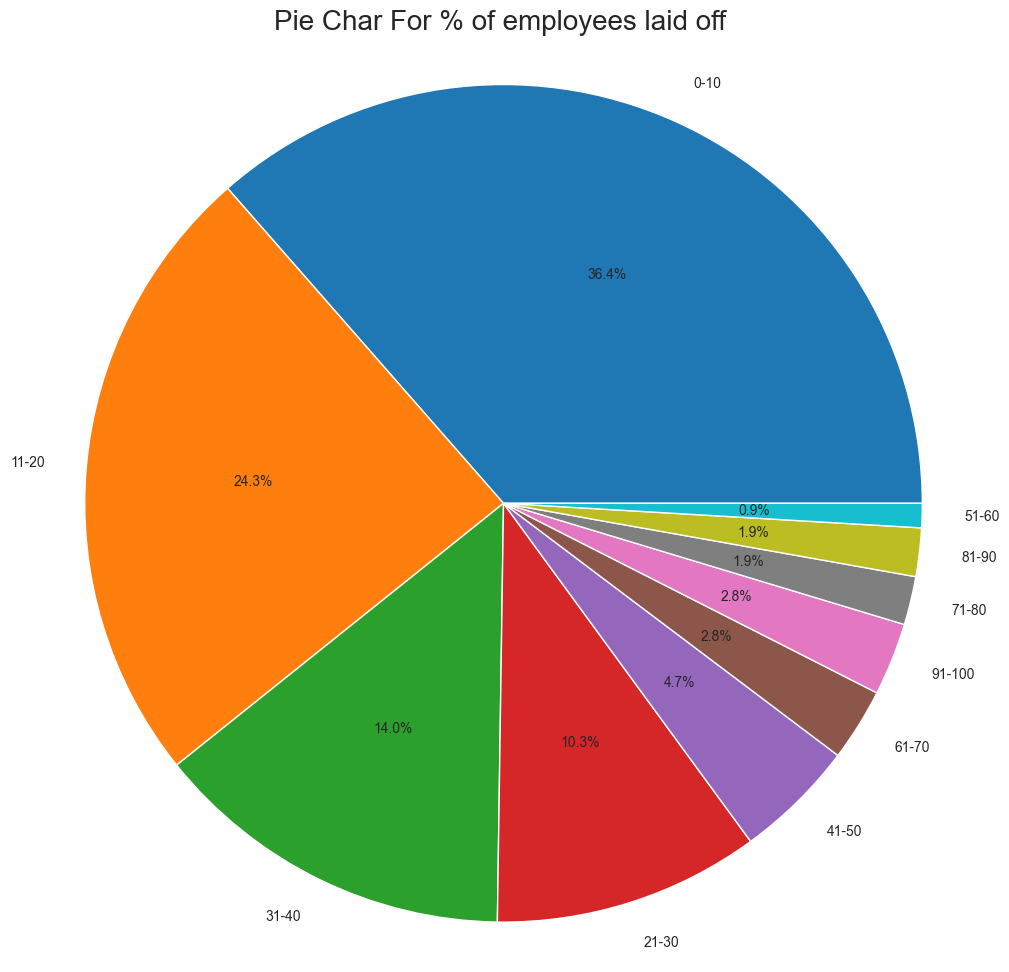

In [34]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
dataframe['Bins'] = pd.cut(dataframe['% of Employees Laid Off'], bins = bins, labels = labels, include_lowest = True)

bin_counts = dataframe['Bins'].value_counts()

plt.figure(figsize=(12, 12))
plt.pie(bin_counts, labels = bin_counts.index, autopct = '%1.1f%%')
plt.axis('equal')

plt.title("Pie Char For % of employees laid off", fontsize = 20)

plt.show()


### Bar Graph For Sectors


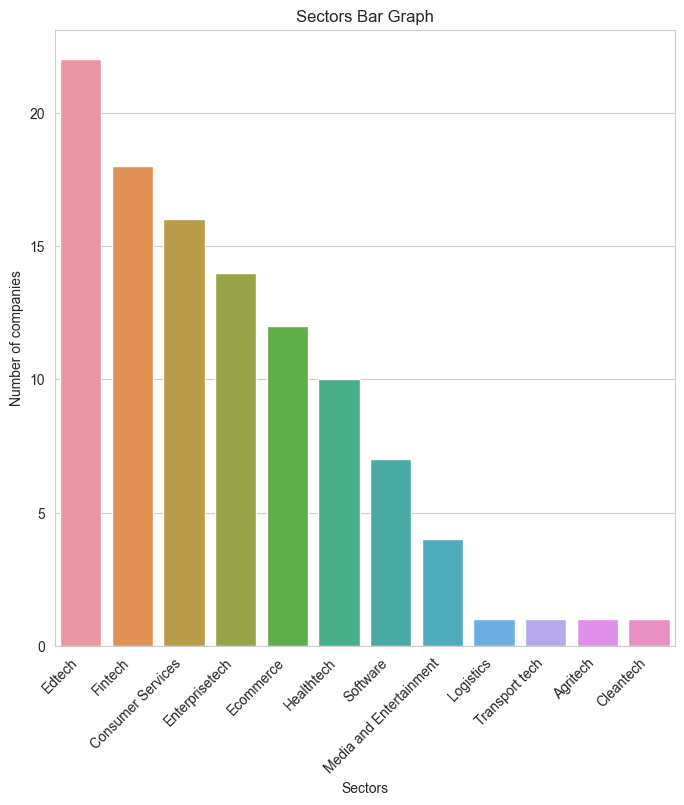

In [35]:
sector_count = dataframe['Sector'].value_counts()

labels = sector_count.index
sizes = sector_count.values

data = {'Category': labels, 'Values' : sizes}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 8))
sns.barplot(x = 'Category', y = 'Values', data = df)

plt.xticks(rotation = 45, ha = 'right')

plt.xlabel('Sectors')
plt.ylabel('Number of companies')
plt.title('Sectors Bar Graph')

plt.show()

### Pie Chart for Sectors

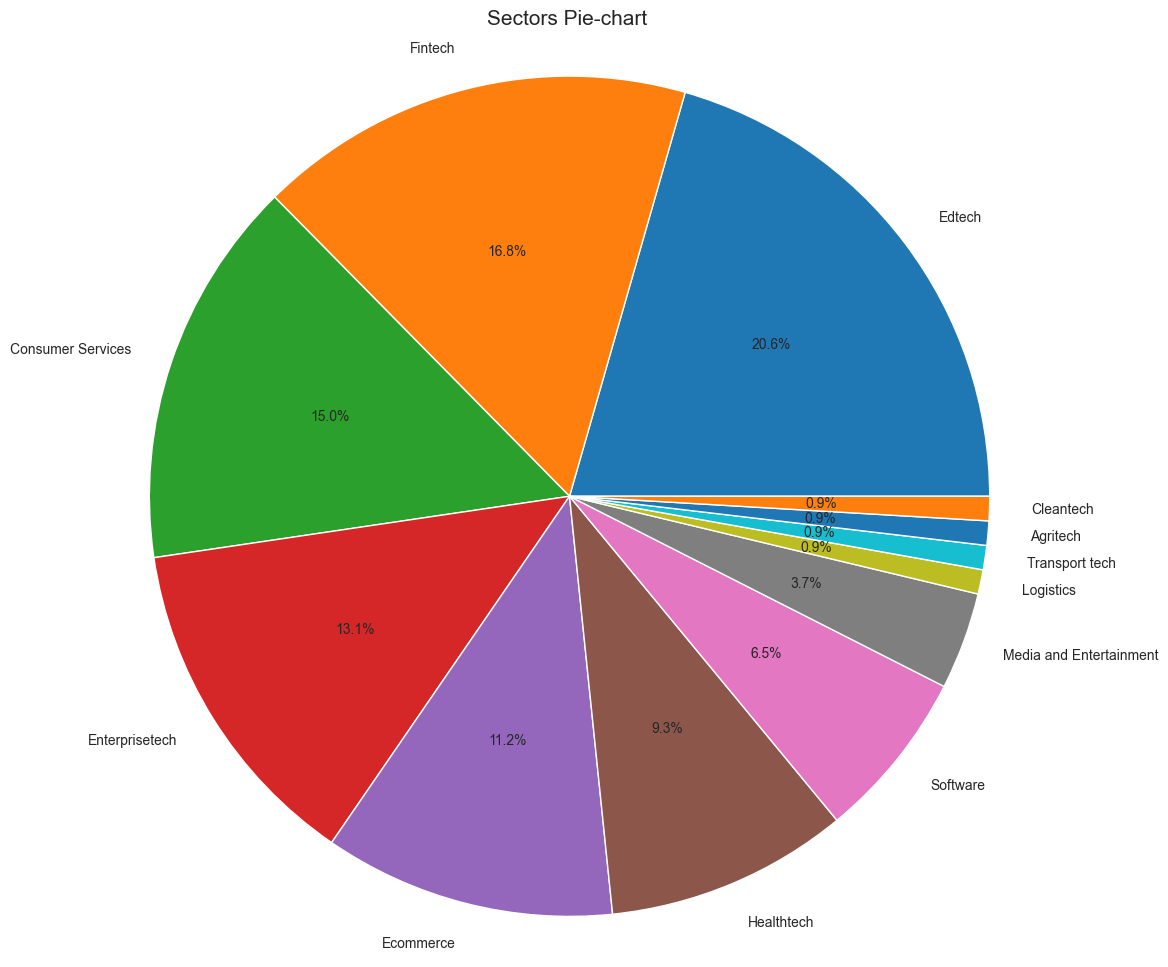

In [36]:
percentage = dataframe['Sector'].value_counts(normalize = True) * 100

labels = percentage.index
sizes = percentage.values

plt.figure(figsize = (12, 12))
wedges, labels, _ = plt.pie(sizes, labels = labels, autopct = '%1.1f%%', wedgeprops = {'linewidth': 1, 'edgecolor': 'white'})

plt.axis('equal')

plt.title('Sectors Pie-chart', fontsize = 15)

plt.show()

### Line Graph For Layoff Reason vs Number of Companies

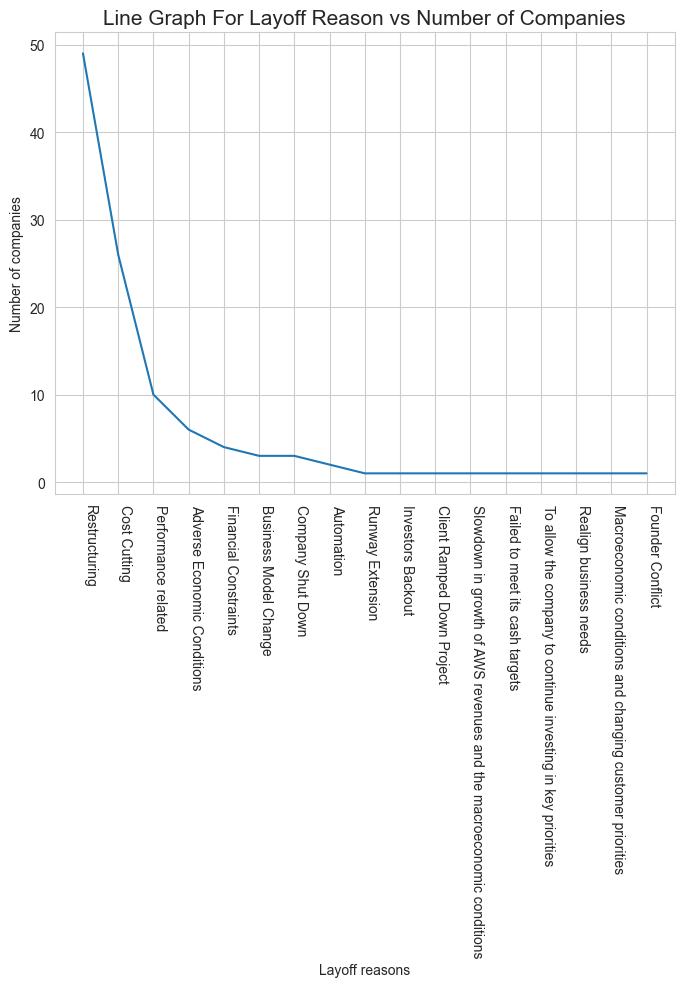

In [37]:
layoff_reasons_count = dataframe['Reason For Layoff'].explode().value_counts()

labels = layoff_reasons_count.index
sizes = layoff_reasons_count.values

data = {'Category': labels, 'Values' : sizes}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.lineplot(x='Category', y='Values', data=df)

plt.xticks(rotation = -90, ha = 'left')

plt.xlabel('Layoff reasons')
plt.ylabel('Number of companies')
plt.title('Line Graph For Layoff Reason vs Number of Companies', fontsize = 15)

plt.show()

### Line Graph For Laid Off % vs Number of Companies

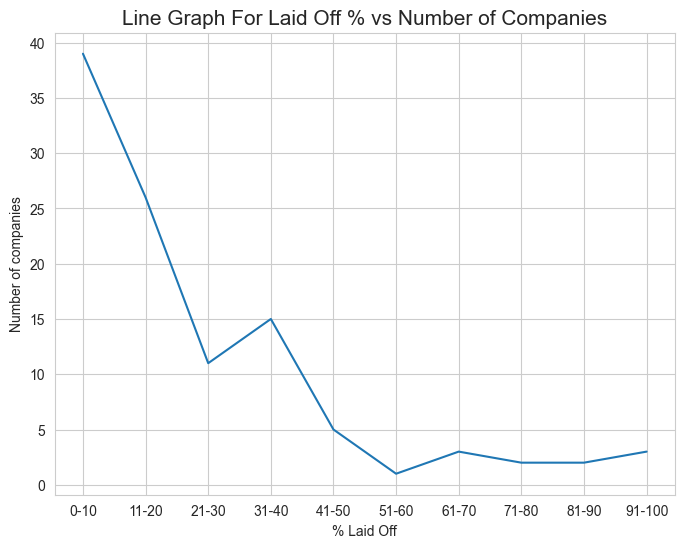

In [38]:
layoff_percentage_bins_count = dataframe['Bins'].explode().value_counts()

labels = layoff_percentage_bins_count.index
sizes = layoff_percentage_bins_count.values

data = {'Category': labels, 'Values' : sizes}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.lineplot(x='Category', y='Values', data=df)

plt.xlabel('% Laid Off')
plt.ylabel('Number of companies')
plt.title('Line Graph For Laid Off % vs Number of Companies', fontsize = 15)

plt.show()

## Queries

### Specific Company Details

In [39]:
company_name = input("Enter company name :")

result = dataframe[dataframe['Company'].str.contains(r"\b" + company_name + r"\b", case = False, regex = True)]

if(len(result) > 0):
    print(result.to_string())
else:
    print("No company found")

  Company  Total No of Employees No of Employees laid off  % of Employees Laid Off                                                      Reason For Layoff     Sector  Bins
0  Amazon               100000.0                     1000                        1  [Slowdown in growth of AWS revenues and the macroeconomic conditions]  Ecommerce  0-10


### Companies with given layoff reason

In [40]:
reason = input("Enter layoff reason :")

filtered_dataframe = dataframe[dataframe['Reason For Layoff'].apply(lambda x: any(reason.lower() in item.lower() for item in x))]

if(len(filtered_dataframe) > 0):
    print(filtered_dataframe.to_string())
else:
    print("No company found")

                Company  Total No of Employees No of Employees laid off  % of Employees Laid Off                 Reason For Layoff             Sector   Bins
1                  Meta                  500.0                       30                        6                    [Cost Cutting]           Software   0-10
5             Cognizant               355300.0                     3500                        1                    [Cost Cutting]           Software   0-10
6               Infosys               335186.0                    15000                        4                    [Cost Cutting]           Software   0-10
10            Unacademy                 6000.0                     1500                       25                    [Cost Cutting]             Edtech  21-30
11              Blinkit                32000.0                     1600                        5                    [Cost Cutting]  Consumer Services   0-10
17               Cars24                 9000.0            